[1p.] Znajdź miasta w Polsce, w których średnie stężenie pyłu “pm10” było niższe niż maksymalne stężenie w Berlinie (w całym badanym okresie). Obliczenia wykonaj dla danych z kilku dni. Wyniki posortuj malejąco po stężeniu pm10.

[1p.]Dla danych z wybranych kilku dni przedstaw w ujęciu godzinowym (wybierz czas UTC) najwyższe zanotowane stężenie pm25 w poszczególnych miastach z całego zbioru danych. Wyniki posortuj po rosnąco datach.

[1p.] Znajdź ranking miast pod względem średniego zanieczyszczenia liczonego dla N najwyższych pomiarów pod względem “pm25” dla danych z kilku dni. Rozważ jedynie miasta, których nazwy składają się z małych i dużych liter alfabetu łacińskiego.
Podpowiedź: Wykorzystaj window functions oraz `rlike`

[1p.] Zwizualizuj na mapie średnie zanieczyszczenie w danym kraju dla wybranych kilku dni względem czasu (mapa + slider czasu albo zbiór klatek i animacja) dla wybranych państw.

[3p.] Korzystanie z klastra dla dużych danych
Proszę wykonać zadanie 1 dla danych z całego miesiąca. Zmierzyć czas wykonania
Zwiększyć klaster do 2, 3, 4, 5, 6, 7 instancji workerów i zmierzyć czasy wykonania
Narysować wykresy czasu, przyspieszenia i efektywności (time, speedup, efficiency)

[1p.] Proszę wykonać przykładowe zapytanie dla danych z całego roku 2020. Załączyć wybrane wykresy ze Spark UI (https://spark.apache.org/docs/latest/web-ui.html), np. DAG, diagram Gantta, informacje o rozmiarach danych.

In [2]:
from pyspark.sql import SparkSession, SQLContext
from pyspark.conf import SparkConf

spark = SparkSession.builder.getOrCreate()

In [3]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window
from pyspark.sql.functions import regexp_replace
from pyspark.sql.functions import substring, col, rank, mean, desc

### For the rest to work You have to first download data from this public s3 bucket

In [44]:
# smog_df = spark.read.json("s3a://openaq-fetches/realtime/2021-11-1[1-4]/*")

In [7]:
smog_df.show(5)

+--------------------+---------------+-------+----------------+-------+--------------------+--------------------+------+---------+----------+----------+-----+-----+
|         attribution|averagingPeriod|   city|     coordinates|country|                date|            location|mobile|parameter|sourceName|sourceType| unit|value|
+--------------------+---------------+-------+----------------+-------+--------------------+--------------------+------+---------+----------+----------+-----+-----+
|[{SPARTAN Network...|     {hours, 1}|Beijing|{40.01, 116.333}|     CN|{2013-11-28T12:00...|SPARTAN - Tsinghu...| false|     pm25|   Spartan|  research|µg/m³| 10.4|
|[{SPARTAN Network...|     {hours, 1}|Beijing|{40.01, 116.333}|     CN|{2013-11-28T08:00...|SPARTAN - Tsinghu...| false|     pm25|   Spartan|  research|µg/m³| 17.4|
|[{SPARTAN Network...|     {hours, 1}|Beijing|{40.01, 116.333}|     CN|{2013-11-28T17:00...|SPARTAN - Tsinghu...| false|     pm25|   Spartan|  research|µg/m³| 49.1|
|[{SPARTAN

In [8]:
smog_df.count()

64

In [9]:
print(smog_df.columns)

['attribution', 'averagingPeriod', 'city', 'coordinates', 'country', 'date', 'location', 'mobile', 'parameter', 'sourceName', 'sourceType', 'unit', 'value']


In [42]:
# smog_df['city'].distinct()

# 1

In [10]:
max_berlin = smog_df.filter(smog_df.city=='Berlin').filter(smog_df.parameter=="pm10").select([F.max("value")])

In [11]:
max_berlin = max_berlin.collect()

In [12]:
max_berlin = max_berlin[0][0]

In [14]:
# sc.install_pypi_package("pandas==0.25.1")

In [16]:
max_berlin

In [11]:
smog_df.createOrReplaceTempView("smog_df")

spark.sql(
    """SELECT DISTINCT country
    FROM smog_df
    WHERE country LIKE "P%"
    """).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+
|country|
+-------+
|     PT|
|     PK|
|     PL|
|     PE|
+-------+

In [21]:
smog_df.createOrReplaceTempView("smog_df")

cleaner_cities = spark.sql(
    """SELECT city, mean(value) as mean_val
    FROM smog_df
    WHERE country = "PL" AND parameter = "pm10"
    GROUP BY city
    HAVING mean_val < {}
    """.format(max_berlin))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [22]:
cleaner_cities = cleaner_cities.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
for city in cleaner_cities['city']:
    print(city)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Rybnik
Łódź
Ustroń
Nysa
Gliwice
Olsztyn
Sosnowiec
Radom
Grajewo
Kołobrzeg
Radzyń Podlaski
Sandomierz
Nowa Ruda
Kutno
Żyrardów
Zawiercie
Żary
Konin
Jasło
Złoty Potok
Strzelce Opolskie
Legionowo
Mielec
Racibórz
Gubin
Piła
Lublin
Gołuchów
Ełk
Belsk Duży
Katowice
Brzeg
Kędzierzyn-Koźle
Cieszyn
Koziegłowy
Wałbrzych
Kielce
Głubczyce
Białystok
Nisko
Solec Kujawski
Toruń
Zabrze
Ostróda
Częstochowa
Rabka-Zdrój
Dąbrowa Górnicza
Inowrocław
Piastów
Olesno
Rymanów-Zdrój
Sulęcin
Tarnobrzeg
Chełm
Olkusz
Włocławek
Szczecinek
Mszana Dolna
Lubliniec
Radomsko
Tarnów
Gajew
Zdzieszowice
Gołdap
Szczecin
Borsukowizna
Wodzisław Śląski
Trzebnica
Piotrków Trybunalski
Łomża
Sopot
Zamość
Warszawa
Dębica
Krosno
Elbląg
Latoszyn
Kostrza
Nowiny
Biskupiec
Kłodzko
Kościerzyna
Koszalin
Rzeszów
Słupsk
Konstancin-Jeziorna
Gdańsk
Lębork
Łask
Augustów
Bydgoszcz
Działoszyn
Siedlce
Malbork
Borówiec
Płock
Zielona Góra
Gdynia
Opole
Gorzów Wielkopolski
Szymbark

# 2

In [47]:
smog_df_pm25 = smog_df.filter(smog_df.parameter=="pm25")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [48]:
smog_df_pm25 = smog_df.filter(smog_df.date.utc > "2021-11-11").filter(smog_df.date.utc < "2021-11-15")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [49]:
smog_df_pm25 = smog_df_pm25.withColumn("hour", substring(F.col("date.utc"), 0, 14))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
group_smog_df_pm25 = smog_df_pm25.groupby(["hour", "city"]).max("value")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
group_smog_df_pm25 = group_smog_df_pm25.orderBy('hour', ascending=1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [21]:
group_smog_df_pm25.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------+--------------------+-----------+
|          hour|                city| max(value)|
+--------------+--------------------+-----------+
|2021-11-11T00:|             Baraboo|       17.0|
|2021-11-11T00:|                Lodi|    673.592|
|2021-11-11T00:|        South Dublin|      12.04|
|2021-11-11T00:|              Vaslui|24.20434492|
|2021-11-11T00:|        Indianapolis|       52.0|
|2021-11-11T00:|  São Caetano do Sul|       42.0|
|2021-11-11T00:|        Jacksonville|       11.4|
|2021-11-11T00:|Rio Claro-Jd.Guan...|       51.0|
|2021-11-11T00:|              Hessen|      900.0|
|2021-11-11T00:|         Carapicuíba|       34.0|
|2021-11-11T00:|                Arad|26.70674405|
|2021-11-11T00:|              Bexley|       40.8|
|2021-11-11T00:|                Gard|       38.6|
|2021-11-11T00:|              DENVER|       17.0|
|2021-11-11T00:|           Fairbanks|       11.0|
|2021-11-11T00:|            Cadillac|        6.0|
|2021-11-11T00:|            SHOSHONE|       31.0|


# 3

In [50]:
N = 5

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [51]:
smog_df_pm25 = smog_df_pm25.filter(smog_df_pm25.city.rlike("[A-Za-z ]"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [52]:
window = Window.partitionBy(smog_df_pm25['city']).orderBy(smog_df_pm25['value'].desc())

smog_df_pm25 = smog_df_pm25.select('*', rank().over(window).alias('rank')).filter(col('rank') <= 5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [55]:
smog_df_pm25 = smog_df_pm25.groupBy("city").agg(mean("value").alias("avg_top_N"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [56]:
smog_df_pm25 = smog_df_pm25.orderBy(desc("avg_top_N"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [57]:
smog_df_pm25.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------------+
|                city|        avg_top_N|
+--------------------+-----------------+
|               Delhi|          11202.0|
|                Pali|9999.899999999998|
|           Faridabad|           9880.0|
|           Ghaziabad|           9874.0|
|Zaječarski upravn...|          9535.85|
|Pčinjski upravni ...|           9330.5|
|             Lucknow|           9174.0|
|              Mumbai|           8412.0|
|           Moradabad|           8358.0|
|              Kanpur|8316.960000000001|
|          Ballabgarh|           8312.0|
|               Noida|           8308.0|
|             Udaipur|           7902.0|
|            Gurugram|           7630.0|
|                Agra|           7520.0|
|             Chennai|           6900.0|
|Rasinski upravni ...|6840.989999999999|
|              Jaipur|6583.333333333333|
|         Muzaffarpur|           6020.0|
|       Greater Noida|           5970.0|
+--------------------+-----------------+
only showing top

# 4

# 5

In [7]:
import time

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [11]:
def runtime_first():
    start = time.time()
    max_berlin = smog_df.filter(smog_df.city=='Berlin').filter(smog_df.parameter=="pm10").select([F.max("value")])
    max_berlin = max_berlin.collect()
    max_berlin = max_berlin[0][0]
    smog_df.createOrReplaceTempView("smog_df")

    cleaner_cities = spark.sql(
        """SELECT city, mean(value) as mean_val
        FROM smog_df
        WHERE country = "PL" AND parameter = "pm10"
        GROUP BY city
        HAVING mean_val < {}
        """.format(max_berlin))
    cleaner_cities = cleaner_cities.toPandas()
    return time.time() - start

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
runtime_first()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

127.22233605384827

In [13]:
times_to_workers = {
    1: 127.22233605384827,
    2: 78.24606966972351,
    3: 62.00518345832825,
    4: 54.501880407333374,
    5: 49.552902936935425,
    6: 48.22799110412598,
    7: 42.94867563247681,
}

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Wykresy:

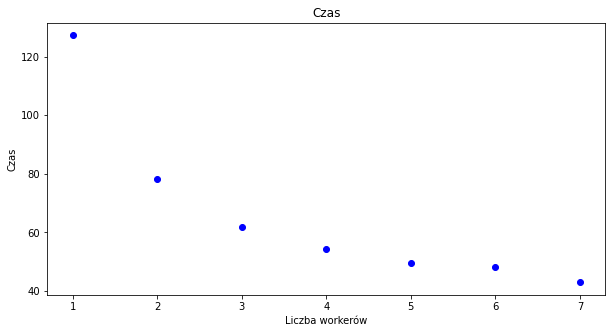

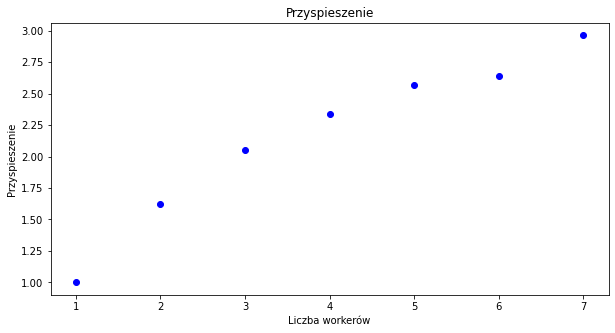

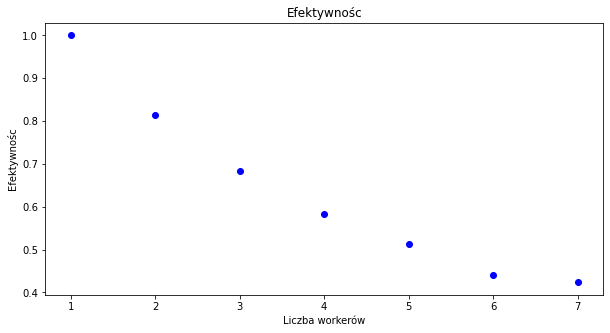

In [15]:
%%local

times_to_workers = {
    1: 127.22233605384827,
    2: 78.24606966972351,
    3: 62.00518345832825,
    4: 54.501880407333374,
    5: 49.552902936935425,
    6: 48.22799110412598,
    7: 42.94867563247681,
}

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title('Czas')
plt.plot(times_to_workers.keys(), times_to_workers.values(),  'bo')
plt.xlabel("Liczba workerów")
plt.ylabel("Czas")
plt.show()

y0 = times_to_workers[1]
speedups = [y0/y for y in times_to_workers.values()]

plt.figure(figsize=(10,5))
plt.title('Przyspieszenie')
plt.plot(times_to_workers.keys(), speedups,  'bo')
plt.xlabel("Liczba workerów")
plt.ylabel("Przyspieszenie")
plt.show()

efficiencies = [s/n for s, n in zip(speedups, times_to_workers.keys())]

plt.figure(figsize=(10,5))
plt.title('Efektywnośc')
plt.plot(times_to_workers.keys(), efficiencies,  'bo')
plt.xlabel("Liczba workerów")
plt.ylabel("Efektywnośc")
plt.show()

# 6